In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты? (4б)** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
# Центрируем данные

X_centered = X - X.mean()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
PCA_df = pca.transform(X)
PCA_df = pd.DataFrame(PCA_df, columns=['PCA_1', 'PCA_2'])

In [5]:
PCA_df.head()

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [6]:
# Доля изначальной дисперсии, объясняемая новыми признаками PCA_1, PCA_2

pca.explained_variance_ratio_.round(3)

array([0.632, 0.211])

In [7]:
PCA_df.head()

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [8]:
# Добавим к полученному датафрейму целевую переменную

PCA_df = pd.concat((PCA_df, y), axis=1)

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению (2б)**


In [9]:
corr = pd.concat((X.corrwith(PCA_df['PCA_1']), X.corrwith(PCA_df['PCA_2'])), axis=1)
corr.columns = ['PCA_1', 'PCA_2']
corr

,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


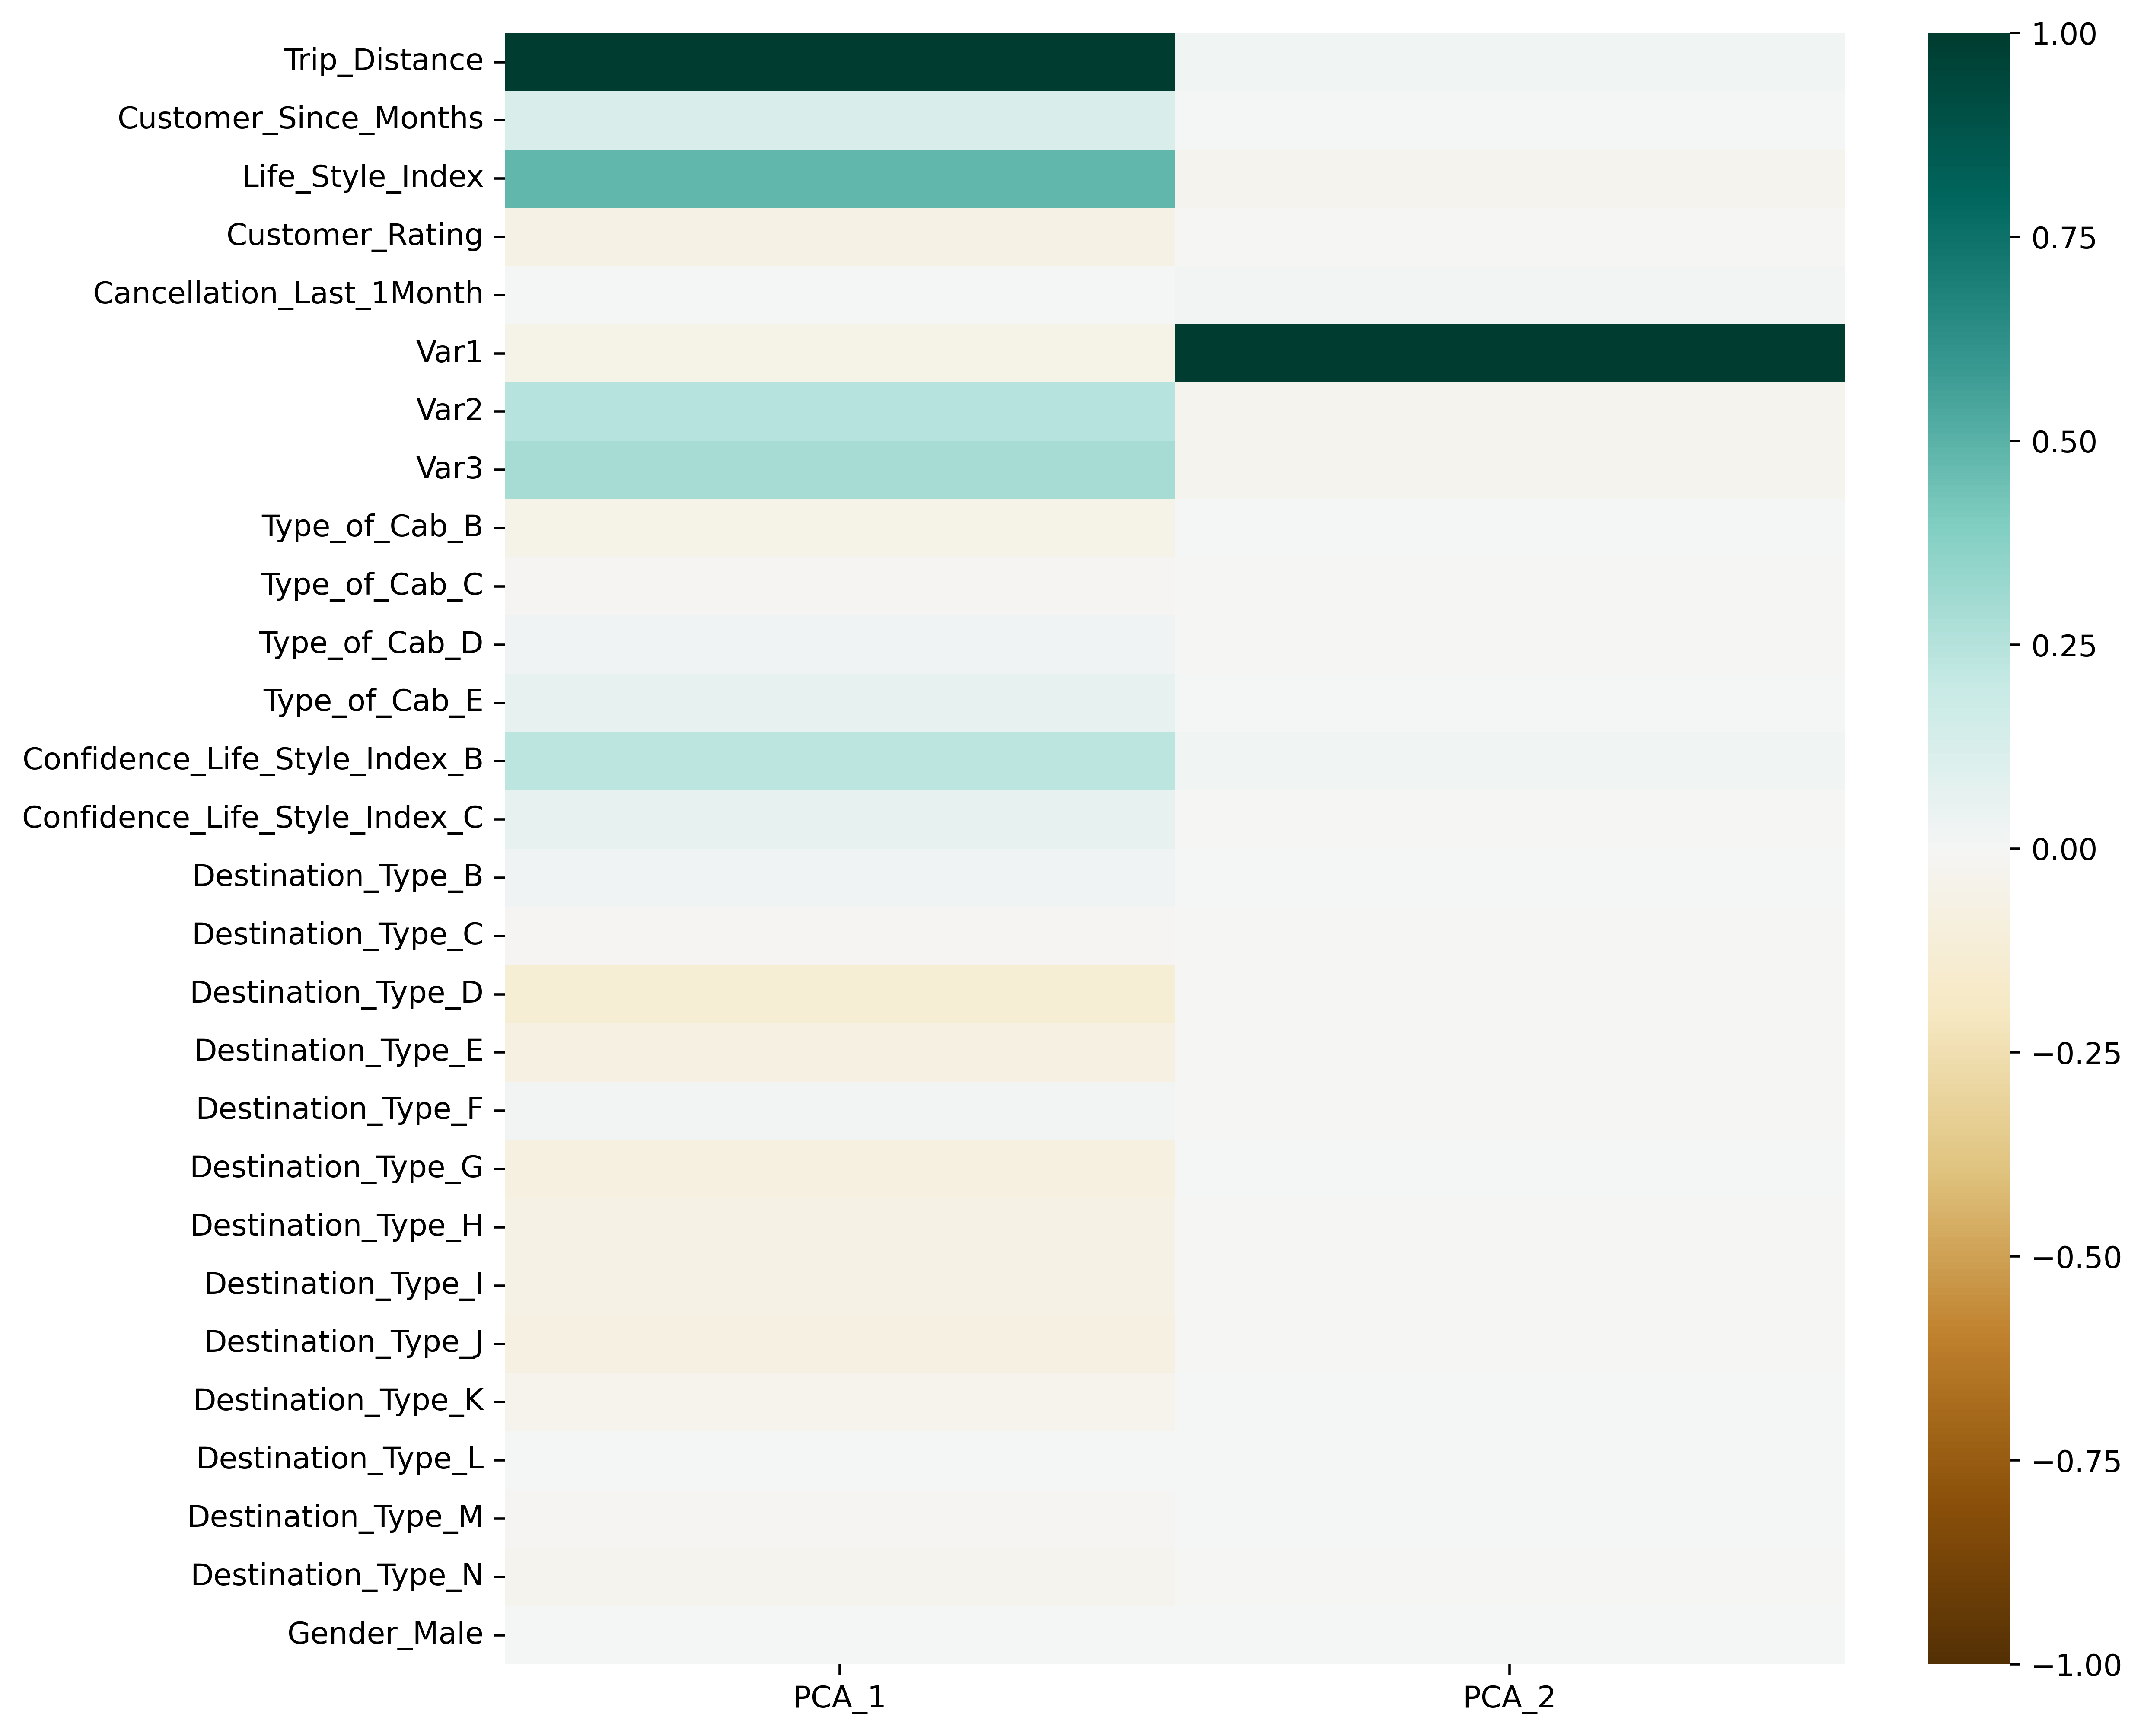

In [10]:
fig = plt.figure(figsize=(10, 10), dpi=500)

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.index,
            vmax=1,
            vmin=-1,
            cmap='BrBG')

plt.show()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой? (2б)**

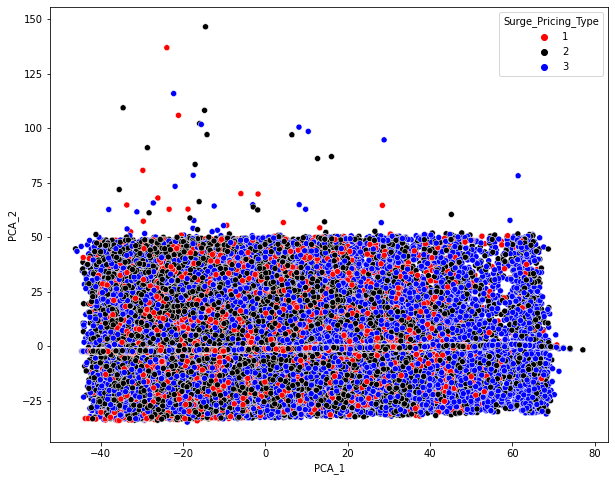

In [11]:
fig = plt.figure(figsize=(10, 8))

sns.scatterplot(data=PCA_df, x=PCA_df['PCA_1'],
                y=PCA_df['PCA_2'], hue='Surge_Pricing_Type', 
                palette=['red', 'black', 'blue'])

plt.show()

In [12]:
pca3 = PCA(n_components=3)
PCA3_df = pd.DataFrame(pca3.fit_transform(X), columns=['PCA_1', 'PCA_2', 'PCA_3'])
PCA3_df.head()

,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [13]:
PCA3_df = pd.concat((PCA3_df, y), axis=1)

In [14]:
PCA3_df['Surge_Pricing_Type'].unique()

array([2, 3, 1])

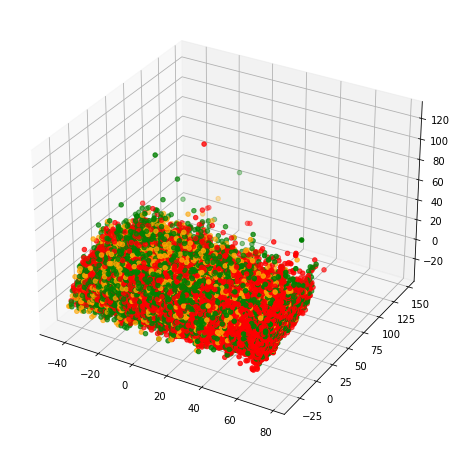

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

colors = PCA3_df['Surge_Pricing_Type'].replace([1, 2, 3], ['orange', 'green', 'red'])

ax.scatter3D(PCA3_df['PCA_1'],
             PCA3_df['PCA_2'],
             PCA3_df['PCA_3'],
             c=colors)

plt.show()

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [16]:
corr3 = pd.concat(((X.corrwith(PCA3_df['PCA_1'])),
                   (X.corrwith(PCA3_df['PCA_2'])),
                   (X.corrwith(PCA3_df['PCA_3']))),
                   axis=1)
corr3.columns = ['PCA_1', 'PCA_2', 'PCA_3']
corr3

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


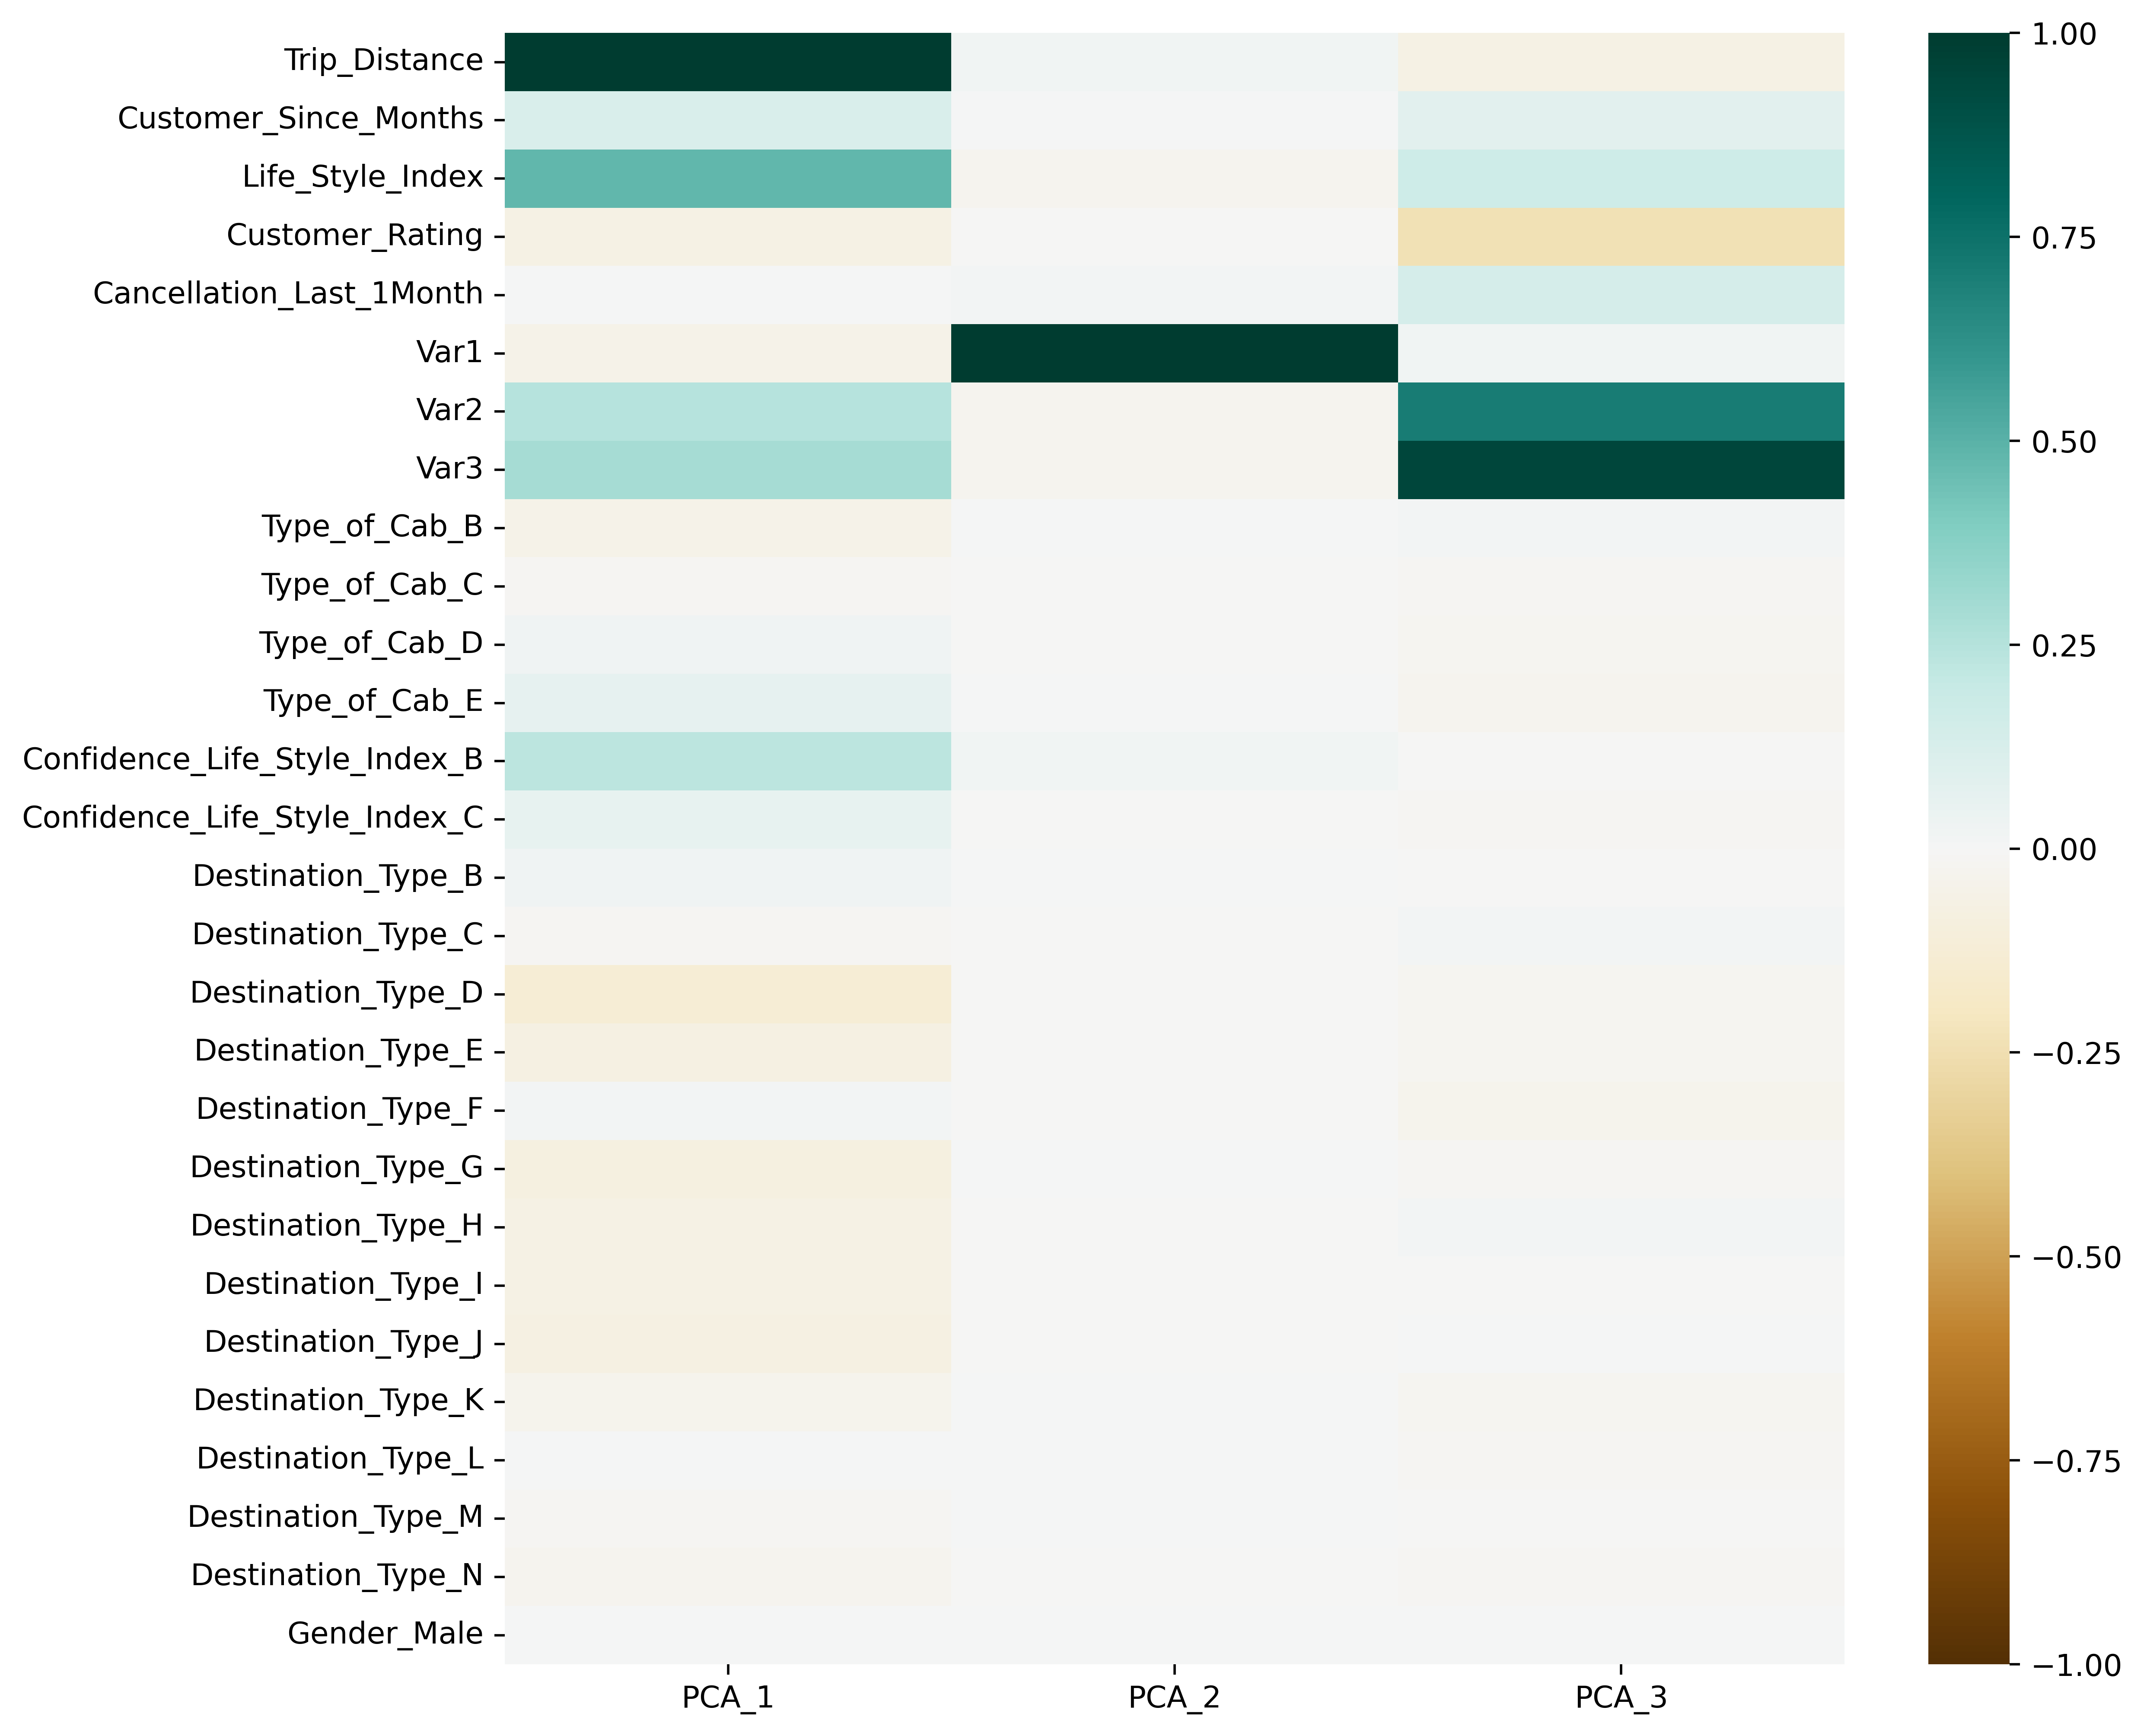

In [17]:
fig = plt.figure(figsize=(10, 10), dpi=500)

sns.heatmap(corr3,
            xticklabels=corr3.columns,
            yticklabels=corr3.index,
            vmax=1,
            vmin=-1,
            cmap='BrBG')

plt.show()

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах и подберите гиперпараметры. Обучите логистическую регрессию на изначальных данных. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях (2б)**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [18]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [20]:
# Строим пайплайн

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('PCA', PCA()),
                 ('LR', LogisticRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA()),
                ('LR', LogisticRegression())])

In [21]:
# Метрики для ЛР, построенной по обычным данным

print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.736     0.539     0.622      5372
           2      0.637     0.825     0.719     11349
           3      0.735     0.589     0.654      9612

    accuracy                          0.680     26333
   macro avg      0.702     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



In [22]:
# Поиск лучших параметров

param_grid = {'LR__penalty': ['l1', 'l2', 'elasticnet'],
              'LR__C': [1e-5, 0.0001, 0.001, 0.01]}

search = GridSearchCV(pipe, param_grid, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': [1e-05, 0.0001, 0.001, 0.01],
                         'LR__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [23]:
# Найденные лучшие параметры

search.best_params_

{'LR__C': 0.001, 'LR__penalty': 'l2'}

In [24]:
# Метрики для наилучших параметров

print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



In [25]:
# Меняем число главных компонент до 2х и фитим search на поиск лучших параметров

pipe.set_params(PCA__n_components=2)

search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA(n_components=2)),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': [1e-05, 0.0001, 0.001, 0.01],
                         'LR__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [26]:
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую (2б)**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [27]:
# Чтобы не писать похожий на предыдущий код,
# Написали функцию, которая будет обучать модель для
# произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [28]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    metrics = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = metrics[0]
    f1_score_dict[n_components] = metrics[1]
    

CPU times: user 5min 22s, sys: 40.3 s, total: 6min 2s
Wall time: 56.8 s


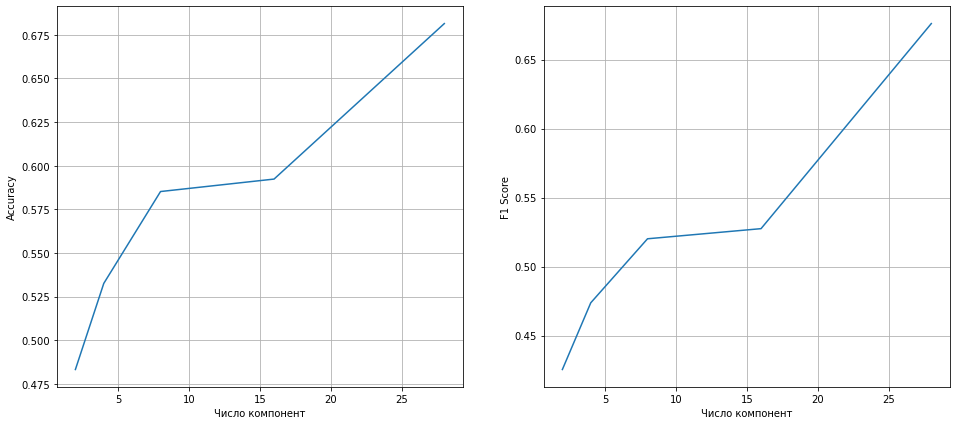

In [29]:
fig = plt.figure(figsize=(16, 7))

ax1 = fig.add_subplot(1, 2, 1)
plt.plot(accuracy_dict.keys(), accuracy_dict.values())
plt.xlabel('Число компонент')
plt.ylabel('Accuracy')
plt.grid()

ax2 = fig.add_subplot(1, 2, 2)
plt.plot(f1_score_dict.keys(), f1_score_dict.values())
plt.xlabel('Число компонент')
plt.ylabel('F1 Score')
plt.grid()

plt.show()

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [30]:
from sklearn.manifold import TSNE

TSNE_df = pd.DataFrame(TSNE(n_components=2).fit_transform(X.head(2000)))

In [31]:
TSNE_df.columns = ['TSNE_1', 'TSNE_2']
TSNE_df.head()

,TSNE_1,TSNE_2
0,-14.874521,17.304817
1,-2.930302,12.547267
2,1.191997,-2.204616
3,31.957066,3.829695
4,17.807093,-11.376626


In [32]:
TSNE_df = pd.concat((TSNE_df, y.head(2000)), axis=1)

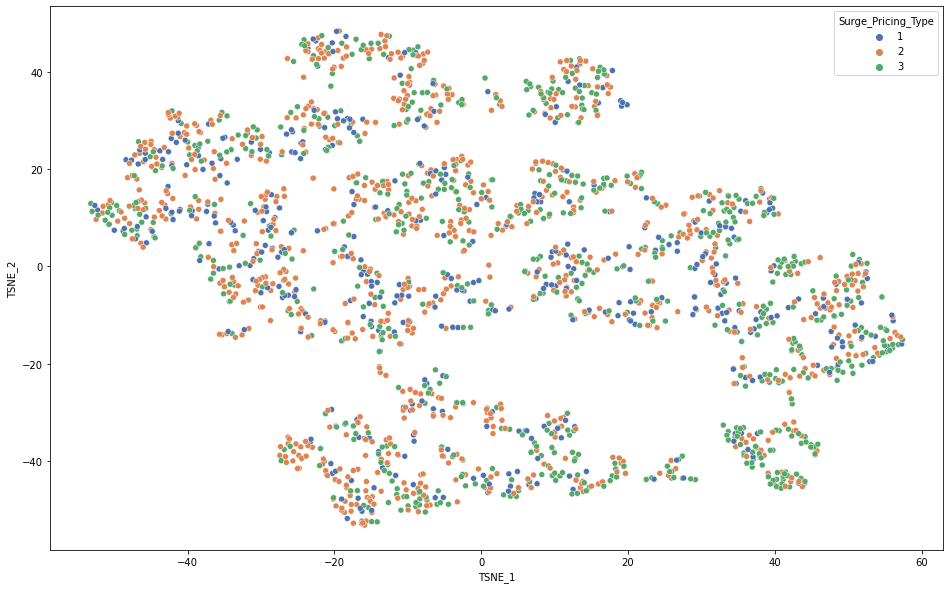

In [33]:
fig = plt.figure(figsize=(16, 10))

sns.scatterplot(data=TSNE_df, x=TSNE_df['TSNE_1'], y=TSNE_df['TSNE_2'], 
                hue='Surge_Pricing_Type', palette='deep')

plt.show()

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [34]:
TSNE3_df = pd.DataFrame(TSNE(n_components=3).fit_transform(X.head(2000)))
TSNE3_df.columns = ['TSNE_1', 'TSNE_2', 'TSNE_3']
TSNE3_df.head()

,TSNE_1,TSNE_2,TSNE_3
0,-1.108686,11.417755,6.622944
1,-3.950740,6.530978,5.620187
2,-0.150993,2.116112,-2.580987
3,-6.826990,-2.457121,-6.191122
4,-5.363505,-1.073656,1.043770


In [35]:
TSNE3_df = pd.concat((TSNE3_df, y.head(200)), axis=1)

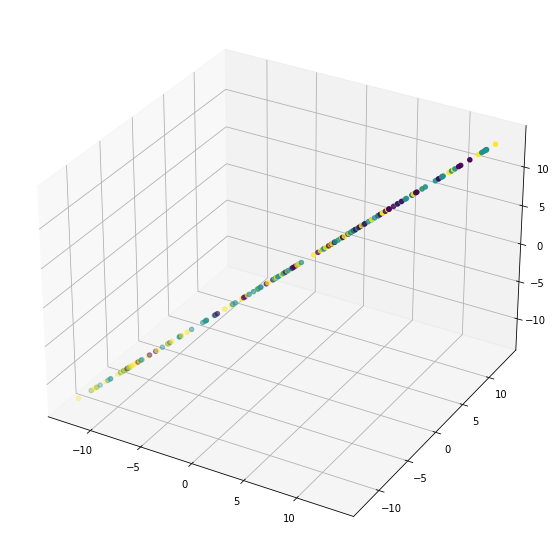

In [36]:
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')


ax.scatter3D(TSNE3_df['TSNE_1'],
             TSNE3_df['TSNE_1'],
             TSNE3_df['TSNE_1'],
             c=TSNE3_df['Surge_Pricing_Type'])

plt.show()